# Economics of Exchange Rates - Modelling

**The Dornbusch Overshooting Model (with a risk premium)**

In [1]:
import numpy as np

import scipy as sp

import sympy as sm
from sympy import *

import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, fixed

sm.init_printing(use_unicode=True)

Consider the following model:

$$
\begin{eqnarray*}
E\dot{s}^e &=& r-r^*-rp\\
E\dot{s} &=& \theta(\bar{s}-s)\\
m-p &=& \eta y - \sigma r\\
y^d &=& \beta + \alpha (s-p+p^*)+\phi y - \lambda r\\
\dot{p} &=& \pi (y^d-y)\\
\end{eqnarray*}
$$

**Calculations**

Define variables

In [2]:
yd = sm.symbols('y^d') 
y = sm.symbols('y') 
rp = sm.symbols('rp') 
r = sm.symbols('r') 
rstar = sm.symbols('r^*') 
theta = sm.symbols('theta') 
eta = sm.symbols('\eta') 
sigma = sm.symbols('\sigma') 
m = sm.symbols('m') 
p = sm.symbols('p')
s = sm.symbols('s') 
sbar = sm.symbols('\overline{s}') 
exschange = sm.symbols('E\dot{s}^e')
schange = sm.symbols('E\dot{s}')
pstar = sm.symbols('p^*')
symphi = sm.symbols('\phi')
symlambda = sm.symbols('\lambda')
pi = sm.symbols('\pi')
symalpha = sm.symbols('alpha')
beta = sm.symbols('beta')
pchange = sm.symbols('\dot{p}')

In [3]:
yd, y, rp, r, rstar, theta, eta, sigma, m, p, s, sbar, exschange, schange, pstar, symphi, symlambda, pi

Define equations

In [10]:
exschange = r-rstar-rp
schange = theta*(sbar-s)
r = (p-m+eta*y)/sigma
yd = beta+symalpha*(s-p+pstar)+symphi*y-symlambda*r
pchange = pi*(yd-y)
exschange

In [9]:
pchange

In [11]:
schange

Find Goods and Money Market equilibrium curves

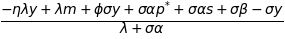

In [12]:
GoodsMarketEqCurve = sm.solve(sm.Eq(pchange,0),p) 
GoodsMarketEqCurve[0]

In [13]:
MoneyMarketEqCurve = sm.solve(sm.Eq(exschange,schange),p)
MoneyMarketEqCurve[0]

Calculate slope of the two curves

In [ ]:
sm.diff(MoneyMarketEqCurve[0],s)

In [ ]:
sm.diff(GoodsMarketEqCurve[0],s)

**Interactive graph of the Dornbusch overshooting model**

A number of parameters can be adjusted below and a shock to the money supply can be performed. This highlights the effect of the overshooting as well as how some of the parameters might affect the overshooting.

For instance it can be seen that for high values of $\theta$ and $\sigma$, the overshooting effect is very limited and as they approach infinity, the overshooting effect will disappear.  

In [89]:
def PlotGraph(alpha, symlambda, sigma, beta, pstar, m, phi, sbar, rstar, theta, mno, y, rp, eta): 
    
    s = np.linspace(-50,50, num=5000) 
    p = np.linspace(-50,50, num=5000) 
    GG2 = (1/(alpha+symlambda/sigma))*(beta+alpha*(s+pstar)-symlambda/sigma*(eta*(y/eta-sigma*rp)-m)+(phi-1)*(y/eta-sigma*rp)) #y is divided by eta in case value of eta is changed - simply determines relative size of m and y. sigma*rp is subtracted to account for loss of income -> equivalent to decrease in r*.  
    GG = (1/(alpha+symlambda/sigma))*(beta+alpha*(s+pstar)-symlambda/sigma*(eta*y-mno)+(phi-1)*y) # mno indicates starting value of m
    MMshock=  -eta*y/eta+(m-mno+sigma*rp)*sigma*theta+sigma*rstar+sigma*rp-sigma*s*theta+m #Sbar has been replaced with (m-mno) so that Sbar adjusts to its long-run equilibrium after a shock to M
    MMnoshock=  -eta*y+0*sigma*theta+sigma*rstar-sigma*s*theta+mno
    femogfyrre = s
    nul = 0
    
         
    fig = plt.figure(figsize=(7,7))
    plt.xlabel("Exchange rate") #Labelling x-axis
    plt.ylabel("Price level") #Labelling y-axis
    plt.title("Dornbusch Overshooting Model") 
    plt.plot(s, GG, color='b', linestyle="-", label="Goods market equilibrium") 
    plt.plot(s, MMnoshock, color='r', linestyle="-", label="Money market equilibrium")
    plt.plot(s, MMshock, color='r', linestyle="-.", label="New money market equilibrium")
    plt.plot(s, GG2, color='b', linestyle="-.", label="New goods market equilibrium")
    plt.plot(s, femogfyrre, color='grey', linestyle='-', label="45 degree line")


    idx = np.argwhere(np.diff(np.sign(MMshock - GG2)) != 0).reshape(-1) + 0
    idx2 = np.argwhere(np.diff(np.sign(MMshock - nul)) != 0).reshape(-1) + 0
    plt.plot(s[idx2], 0, 'go', label="Short run effect")
    plt.plot(s[idx], MMshock[idx], 'ko', label="Long run equilibrium")

    plt.plot((s[idx2],0),(0, 0), linestyle=":", color='grey')
    plt.plot((-25,-25),(0, -25), linestyle=":", color='grey')
    plt.plot((s[idx],-25),(s[idx], MMshock[idx]), linestyle=":", color='grey')
    plt.plot([s[idx], MMshock[idx]],[s[idx], -25], linestyle=":", color='grey')
    plt.plot([s[idx2],s[idx2]],[-25,0], linestyle=":", color='grey')
    plt.plot([s[idx2],-25],[0,0], linestyle=":", color='grey')
    
   # if s[idx2]>0:
    #    plt.arrow(s[idx2]/2, 0, 1.5, 0, length_includes_head=True,
     #     head_width=0.8, head_length=0.8, color='k')
      #  plt.arrow(s[idx2]-s[idx], 0, -1.5, MMshock[idx], length_includes_head=True,
       #   head_width=0.8, head_length=0.8, color='k')


    
    plt.text(-1, -30, '$s_1$')
    plt.text(s[idx2]-1, -32, '$s_2$')
    plt.text(s[idx]-1, -34, '$\overline{s}$')
    
    plt.text(-30, 0, '$p_{1,2}$')
    plt.text(-32, MMshock[idx], '$\overline{p}$')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.xticks([])
    #plt.yticks([])
    plt.ylim((-25,25))
    plt.xlim((-25,25))



In [90]:
widgets.interact(PlotGraph,
                 alpha=widgets.FloatSlider(description="$\\alpha$", min=0.05, max=2 , step=0.05, value=1),
                 symlambda=widgets.FloatSlider(description="$\lambda$", min=0, max=10 , step=0.05, value=1),
                 sigma=widgets.FloatSlider(description="$\sigma$", min=0.7, max=10 , step=0.05, value=1),
                 beta=widgets.fixed(0),
                 pstar=widgets.fixed(0), 
                 eta=widgets.fixed(1),
                 phi=widgets.fixed(1), 
                 y=widgets.fixed(100), 
                 m=widgets.FloatSlider(description="$m$", min=90, max=110, step=1, value=100),
                 sbar=widgets.fixed(0), 
                 rstar=widgets.fixed(0), 
                 theta=widgets.FloatSlider(description="$\\theta$", min=0.5, max=20 , step=0.5, value=1),
                 rp=widgets.FloatSlider(description="Risk premium", min=0, max=11, step=1, value=0),
                 mno=widgets.fixed(100),
                 )



interactive(children=(FloatSlider(value=1.0, description='$\\alpha$', max=2.0, min=0.05, step=0.05), FloatSlid…

<function __main__.PlotGraph(alpha, symlambda, sigma, beta, pstar, m, phi, sbar, rstar, theta, mno, y, rp, eta)>